# Model


In [1]:
import numpy as np
#from keras.engine import Model
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from keras.models import load_model

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## Load mini_data set

In [25]:
%time mini_X_train = np.load('mini_train_data/X_train.npy')
%time mini_y_train = np.load('mini_train_data/y_train.npy')
print(mini_X_train.shape,type(mini_X_train))
print(mini_y_train.shape,type(mini_y_train))

CPU times: user 1.42 ms, sys: 79.1 ms, total: 80.5 ms
Wall time: 105 ms
CPU times: user 1.17 ms, sys: 718 µs, total: 1.89 ms
Wall time: 2.37 ms
(115, 160, 160, 3) <class 'numpy.ndarray'>
(115, 176) <class 'numpy.ndarray'>


## Using Transfer Learning - VGGFace - kera

In [2]:
vgg_model = VGGFace(include_top=False, input_shape=(160, 160, 3))

weights_path:  /Users/zouxiaxia/Documents/Study/Projects/Facial-Landmark/pretrained_vggface_model/rcmalli_vggface_tf_notop_v2.h5
-------success load weights----------


In [3]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 160, 160, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 160, 160, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 80, 80, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 80, 80, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 80, 80, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 40, 40, 128)       0         
__________

In [4]:
#custom parameters
num_hidden6 = 1024
# num_hidden7 = 512
num_outputs = 88*2


last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(num_hidden6, activation='relu', name='fc6')(x) #, kernel_initializer ='he_normal'
out = Dense(num_outputs, name='fc7')(x)
# x = Dense(num_hidden7, activation='relu', name='fc7')(x)
# out = Dense(num_outputs, name='fc8')(x)
vgg_facical_landmark = Model(vgg_model.input, out)


In [7]:
print(len(vgg_model.layers))
print(len(vgg_facical_landmark.layers))
print(vgg_facical_landmark.layers[len(vgg_model.layers):])

19
22
[<keras.layers.core.Flatten object at 0x120fb2f28>, <keras.layers.core.Dense object at 0x122f00438>, <keras.layers.core.Dense object at 0x122f00eb8>]


In [8]:
#To set the conv layers to non-trainable (weights will not be updated)

for layer in vgg_facical_landmark.layers[:19]:
    layer.trainable = False

In [9]:
# Train your model as usual.
from keras import optimizers

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)# , clipnorm=10.
vgg_facical_landmark.compile(optimizer=adam, loss='mean_squared_error')


In [15]:
mini_X_train, mini_y_train.fit(mini_X_train, mini_y_train, batch_size=64, epochs=2)

Epoch 1/2
115/115 [==============================] - 52s - loss: 6446.2413     
Epoch 2/2
115/115 [==============================] - 50s - loss: 5490.0723     


In [16]:
from keras.models import load_model

vgg_facical_landmark.save('training_models/mini_train_model_test1.h5')  


vgg = load_model('training_models/mini_train_model_test1.h5')
vgg.evaluate(mini_X_train, mini_y_train)

115/115 [==============================] - 44s    


4664.6537703804352

In [ ]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint

filepath="training_models/mini_train_model_test_{epoch}_{loss:.3f}.h5"
callbacks = [EarlyStopping(monitor='loss',patience=10),
             ModelCheckpoint(filepath, monitor='loss',save_best_only=True)]    

vgg_facical_landmark.fit(mini_X_train, mini_y_train,epochs=1000,batch_size=64,callbacks=callbacks,shuffle="batch")
# scores = model1.evaluate(mini_X_train, mini_y_train, verbose=0)

Epoch 1/1000
115/115 [==============================] - 50s - loss: 4420.1628     
Epoch 2/1000
115/115 [==============================] - 50s - loss: 3308.5831     
Epoch 3/1000
115/115 [==============================] - 283s - loss: 2264.7833     
Epoch 4/1000
115/115 [==============================] - 61s - loss: 1410.6961     
Epoch 5/1000
115/115 [==============================] - 869s - loss: 848.9118     
Epoch 6/1000
115/115 [==============================] - 64s - loss: 614.2799     
Epoch 7/1000
115/115 [==============================] - 50s - loss: 623.6087     
Epoch 8/1000
115/115 [==============================] - 1185s - loss: 705.3695   
Epoch 9/1000
115/115 [==============================] - 1914s - loss: 713.5044    
Epoch 10/1000
115/115 [==============================] - 3843s - loss: 612.3435   
Epoch 11/1000
115/115 [==============================] - 512s - loss: 457.4399     
Epoch 12/1000
115/115 [==============================] - 200s - loss: 323.1418    
Epoch

In [5]:
vgg = load_model('training_models/mini_train_model_test_13_240.330.h5')
vgg.evaluate(mini_X_train, mini_y_train)

115/115 [==============================] - 49s    


256.4943760084069

In [7]:
for layer in vgg.layers[:19]:
    layer.trainable = False

In [ ]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint

filepath="training_models/mini_train_model_test_{epoch}_{loss:.3f}.h5"
callbacks = [EarlyStopping(monitor='loss',patience=10),
             ModelCheckpoint(filepath, monitor='loss',save_best_only=True)]    

vgg.fit(mini_X_train, mini_y_train,epochs=1000,batch_size=64,callbacks=callbacks,shuffle="batch")

Epoch 1/1000
115/115 [==============================] - 71s - loss: 261.0009     
Epoch 2/1000
115/115 [==============================] - 68s - loss: 282.3010     
Epoch 3/1000
115/115 [==============================] - 57s - loss: 284.8228     
Epoch 4/1000
115/115 [==============================] - 56s - loss: 264.4166     
Epoch 5/1000
115/115 [==============================] - 49s - loss: 228.6728     
Epoch 6/1000
115/115 [==============================] - 49s - loss: 190.9612     
Epoch 7/1000
115/115 [==============================] - 48s - loss: 162.9552     
Epoch 8/1000
115/115 [==============================] - 47s - loss: 149.7482     
Epoch 9/1000
115/115 [==============================] - 47s - loss: 148.2517     
Epoch 10/1000
115/115 [==============================] - 46s - loss: 150.6602     
Epoch 11/1000
115/115 [==============================] - 47s - loss: 149.8962     
Epoch 12/1000
115/115 [==============================] - 47s - loss: 143.5626     
Epoch 13/1000

115/115 [==============================] - 48s - loss: 7.1813     
Epoch 200/1000
115/115 [==============================] - 48s - loss: 7.1110     
Epoch 201/1000
115/115 [==============================] - 48s - loss: 7.0416     
Epoch 202/1000
115/115 [==============================] - 48s - loss: 6.9730     
Epoch 203/1000
115/115 [==============================] - 48s - loss: 6.9052     
Epoch 204/1000
115/115 [==============================] - 48s - loss: 6.8383     
Epoch 205/1000
115/115 [==============================] - 48s - loss: 6.7722     
Epoch 206/1000
115/115 [==============================] - 48s - loss: 6.7068     
Epoch 207/1000
115/115 [==============================] - 48s - loss: 6.6423     
Epoch 208/1000
115/115 [==============================] - 48s - loss: 6.5785     
Epoch 209/1000
115/115 [==============================] - 47s - loss: 6.5156     
Epoch 210/1000
115/115 [==============================] - 47s - loss: 6.4533     
Epoch 211/1000
115/115 [=======

115/115 [==============================] - 47s - loss: 3.2578     
Epoch 300/1000
115/115 [==============================] - 48s - loss: 3.2388     
Epoch 301/1000
115/115 [==============================] - 48s - loss: 3.2201     
Epoch 302/1000
115/115 [==============================] - 48s - loss: 3.2015     
Epoch 303/1000
115/115 [==============================] - 48s - loss: 3.1832     
Epoch 304/1000
115/115 [==============================] - 48s - loss: 3.1650     
Epoch 305/1000
115/115 [==============================] - 48s - loss: 3.1471     
Epoch 306/1000
115/115 [==============================] - 47s - loss: 3.1293     
Epoch 307/1000
115/115 [==============================] - 48s - loss: 3.1117     
Epoch 308/1000
115/115 [==============================] - 48s - loss: 3.0943     
Epoch 309/1000
115/115 [==============================] - 47s - loss: 3.0771     
Epoch 310/1000
115/115 [==============================] - 48s - loss: 3.0600     
Epoch 311/1000
115/115 [=======

115/115 [==============================] - 47s - loss: 2.0018     
Epoch 400/1000
115/115 [==============================] - 47s - loss: 1.9934     
Epoch 401/1000
115/115 [==============================] - 47s - loss: 1.9850     
Epoch 402/1000
115/115 [==============================] - 48s - loss: 1.9766     
Epoch 403/1000
115/115 [==============================] - 48s - loss: 1.9684     
Epoch 404/1000
115/115 [==============================] - 48s - loss: 1.9601     
Epoch 405/1000
115/115 [==============================] - 48s - loss: 1.9519     
Epoch 406/1000
115/115 [==============================] - 48s - loss: 1.9438     
Epoch 407/1000
115/115 [==============================] - 47s - loss: 1.9357     
Epoch 408/1000
115/115 [==============================] - 48s - loss: 1.9276     
Epoch 409/1000
115/115 [==============================] - 47s - loss: 1.9196     
Epoch 410/1000
115/115 [==============================] - 48s - loss: 1.9117     
Epoch 411/1000
115/115 [=======

115/115 [==============================] - 47s - loss: 1.3488     
Epoch 500/1000
115/115 [==============================] - 48s - loss: 1.3438     
Epoch 501/1000
115/115 [==============================] - 48s - loss: 1.3388     
Epoch 502/1000
115/115 [==============================] - 48s - loss: 1.3338     
Epoch 503/1000
115/115 [==============================] - 48s - loss: 1.3288     
Epoch 504/1000
115/115 [==============================] - 48s - loss: 1.3238     
Epoch 505/1000
115/115 [==============================] - 48s - loss: 1.3189     
Epoch 506/1000
115/115 [==============================] - 48s - loss: 1.3140     
Epoch 507/1000
115/115 [==============================] - 47s - loss: 1.3091     
Epoch 508/1000
115/115 [==============================] - 48s - loss: 1.3043     
Epoch 509/1000
115/115 [==============================] - 48s - loss: 1.2994     
Epoch 510/1000
115/115 [==============================] - 47s - loss: 1.2946     
Epoch 511/1000
115/115 [=======

115/115 [==============================] - 48s - loss: 0.9395     
Epoch 600/1000
115/115 [==============================] - 47s - loss: 0.9362     
Epoch 601/1000
115/115 [==============================] - 48s - loss: 0.9329     
Epoch 602/1000
115/115 [==============================] - 47s - loss: 0.9297     
Epoch 603/1000
115/115 [==============================] - 48s - loss: 0.9264     
Epoch 604/1000
115/115 [==============================] - 47s - loss: 0.9232     
Epoch 605/1000
115/115 [==============================] - 48s - loss: 0.9200     
Epoch 606/1000
115/115 [==============================] - 47s - loss: 0.9168     
Epoch 607/1000
115/115 [==============================] - 48s - loss: 0.9136     
Epoch 608/1000
115/115 [==============================] - 47s - loss: 0.9104     
Epoch 609/1000
115/115 [==============================] - 48s - loss: 0.9072     
Epoch 610/1000
115/115 [==============================] - 48s - loss: 0.9041     
Epoch 611/1000
115/115 [=======

115/115 [==============================] - 48s - loss: 0.6667     
Epoch 700/1000
115/115 [==============================] - 48s - loss: 0.6644     
Epoch 701/1000
115/115 [==============================] - 48s - loss: 0.6622     
Epoch 702/1000
115/115 [==============================] - 48s - loss: 0.6599     
Epoch 703/1000
115/115 [==============================] - 48s - loss: 0.6577     
Epoch 704/1000
115/115 [==============================] - 48s - loss: 0.6555     
Epoch 705/1000
115/115 [==============================] - 47s - loss: 0.6533     
Epoch 706/1000
115/115 [==============================] - 47s - loss: 0.6511     
Epoch 707/1000
115/115 [==============================] - 47s - loss: 0.6489     
Epoch 708/1000
115/115 [==============================] - 48s - loss: 0.6467     
Epoch 709/1000
115/115 [==============================] - 48s - loss: 0.6446     
Epoch 710/1000
115/115 [==============================] - 47s - loss: 0.6424     
Epoch 711/1000
115/115 [=======

115/115 [==============================] - 48s - loss: 0.4772     
Epoch 800/1000
115/115 [==============================] - 48s - loss: 0.4756     
Epoch 801/1000
115/115 [==============================] - 48s - loss: 0.4740     
Epoch 802/1000
115/115 [==============================] - 48s - loss: 0.4725     
Epoch 803/1000
115/115 [==============================] - 49s - loss: 0.4709     
Epoch 804/1000
115/115 [==============================] - 48s - loss: 0.4693     
Epoch 805/1000
115/115 [==============================] - 48s - loss: 0.4678     
Epoch 806/1000
115/115 [==============================] - 48s - loss: 0.4662     
Epoch 807/1000
115/115 [==============================] - 48s - loss: 0.4647     
Epoch 808/1000
115/115 [==============================] - 49s - loss: 0.4632     
Epoch 809/1000
115/115 [==============================] - 48s - loss: 0.4616     
Epoch 810/1000
115/115 [==============================] - 48s - loss: 0.4601     
Epoch 811/1000
115/115 [=======

KeyboardInterrupt: 

# train using full dataset

In [2]:
%time X_data = np.load('train_data/X_data.npy')
%time y_data = np.load('train_data/y_data.npy')
print(X_data.shape,type(X_data))
print(y_data.shape)

CPU times: user 2.02 ms, sys: 7.76 s, total: 7.76 s
Wall time: 12.3 s
CPU times: user 1.22 ms, sys: 15.9 ms, total: 17.1 ms
Wall time: 31.3 ms
(11703, 160, 160, 3) <class 'numpy.ndarray'>
(11703, 176)


In [4]:
# Step 1: Shuffle (X, Y)
np.random.seed(0)
permutation = list(np.random.permutation(X_data.shape[0]))
X_val = X_data[permutation[:2000]]
X_test = X_data[permutation[2000:3000]]
X_train = X_data[permutation[3000:]]
y_val = y_data[permutation[:2000]]
y_test = y_data[permutation[2000:3000]]
y_train = y_data[permutation[3000:]]


AttributeError: 'numpy.ndarray' object has no attribute 'write'

In [5]:
np.save('train_data/X_val.npy',X_val)
np.save('train_data/X_test.npy',X_test)
np.save('train_data/X_train.npy',X_train)
np.save('train_data/y_val.npy',y_val)
np.save('train_data/y_test.npy',y_test)
np.save('train_data/y_train.npy',y_train)

## Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imsave,imread,imresize


%matplotlib inline

In [2]:
import cv2

    
def draw_circle(img, dots, color=(255,250,205), thick=3):
    draw_img = np.copy(img)
    for dot in dots:
        draw_img = cv2.circle(draw_img,dot,1,color,-1,thick)
    return draw_img 

def flatten_lists_to_tuples(points):
    points = np.reshape(points,(-1,2))
    pts = tuple([(x,y) for x,y in points])
    return pts

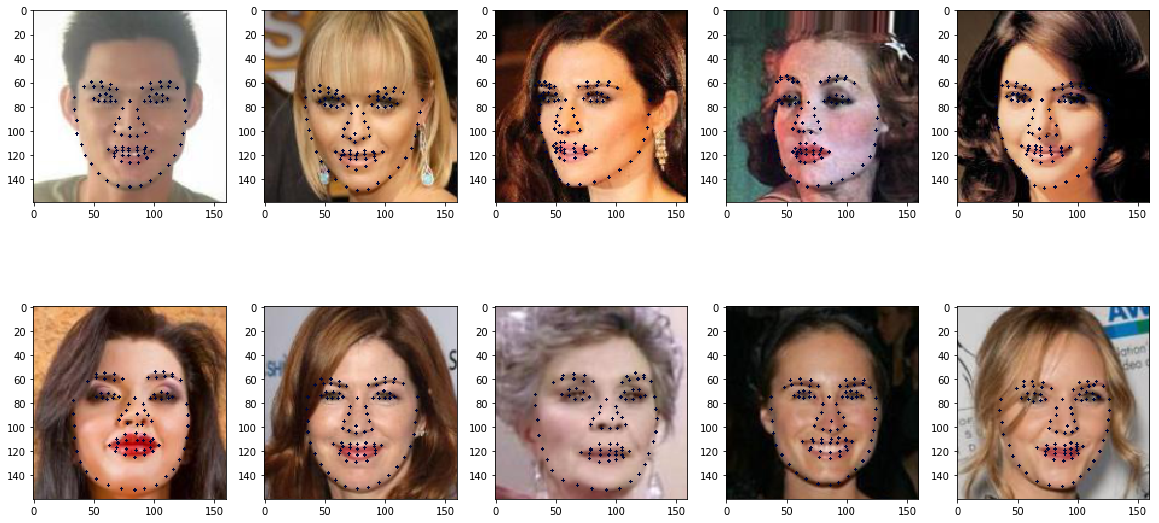

In [11]:
plt.figure(figsize=(20, 10))

for i in range(20,30):
    result = draw_circle(mini_X_train[i], flatten_lists_to_tuples(pred_y[i]))
    plt.subplot(2, 5, i+1-20)
    plt.imshow(result)

## 用普通网络训练

In [ ]:
import numpy as np
from keras.layers import Flatten, Dense, Input
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,Merge,Concatenate,merge
from keras.layers import Conv2D,MaxPooling2D,Lambda,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint
from keras.models import Model
from keras.models import load_model
from keras import regularizers

%load_ext autoreload
%autoreload 2

In [ ]:

def model(inputs_shape=None, activation='relu', optimizer = 'adam', loss='mean_squared_error'):
    
    image_input = Input(shape = inputs_shape[1:])
    #x = Lambda(lambda x: x/255.0,input_shape = X_train.shape[1:])(image_input)

    x = Conv2D(32,(3,3),padding='same')(image_input)
    x = BatchNormalization(axis=3)(x)
    x = Activation(activation)(x)

    x = Flatten()(x)
    x = Dense(200)(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation(activation)(x)

    out = Dense(176)(x)
    
    model = Model(inputs=image_input, outputs=out)
    model.compile(optimizer=optimizer, loss=loss)

    return model


In [ ]:
model = model(mini10_X_train.shape)

In [ ]:
model.fit(mini10_X_train, mini10_y_train, batch_size=1, epochs=100)

## Error Analysis


In [1]:
import numpy as np
from keras.models import Model

Using TensorFlow backend.


In [2]:
from keras.models import load_model

model = load_model('third_035_3.828.h5')

In [3]:
X_val = np.load('train_data/X_val.npy')
y_val = np.load('train_data/y_val.npy')
y_val = y_val[:,np.r_[134:176, 92:118, 16:60, 76:92, 0:16, 118:134, 60:76]]
print("X_val shape: ",X_val.shape)
print("y_val shape: ",y_val.shape)

X_val shape:  (2000, 160, 160, 3)
y_val shape:  (2000, 176)


In [4]:
pred_y = model.predict(X_val)
val_mse = np.mean(np.square(pred_y-y_val), axis=1)

In [5]:
model.evaluate(X_val,y_val)

2000/2000 [==============================] - 840s   


2.9835449714660642

In [31]:
error_idx = np.where(val_mse > 4)

In [11]:
np.mean(s,axis=1)

array([ 1.14848077,  3.6072114 ,  1.49918162,  3.15484171,  8.0106024 ])

In [ ]:
error_idx = np.where(val_mse > 8)

In [32]:
error_X = X_val[error_idx]
error_y = y_val[error_idx]
error_mse = val_mse[error_idx]
error_pred = pred_y[error_idx]
len(error_X)

346

In [60]:
error_mse[:10]

array([  8.0106024 ,   9.39026842,   5.52313399,  10.25138884,
         4.26342162,   6.20738393,   4.40953887,   4.97019838,
         5.10658625,   4.87932128])

In [62]:
np.where(np.square(pred_y-y_val)[error_idx][5] > 8)

(array([  7,   9,  10,  11,  13,  14,  15,  16,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  28,  29,  30,  32,  33,  34,  35,  36,  38,
         40,  47,  49,  51,  58,  60,  61,  65,  67,  69,  73,  77,  79,
         80,  90,  97,  99, 101, 112, 126, 136, 138, 140, 146, 160, 162,
        168, 170, 174]),)

In [33]:
np.mean(error_mse)

6.0504936843124613

如果解决这53张mse>8的图片的问题，(2.98*2000-53*10.74)/1947=2.768 提升不是很大   
346张mse>4  (2.98*2000-346*6.05)/1654=2.337

In [5]:
from os import listdir

def get_images_namelist(filepath):
    images_namelists = []

    for file in listdir(filepath):
        if file.endswith(".json"):
            images_namelists.append(file.split(".")[0])
    return images_namelists

In [9]:
name_list = get_images_namelist('img_align_celeba_dots/')

In [ ]:
# get total data set
images_namelists = get_images_namelist("/img_align_celeba_dots")
img_num = len(images_namelists)
print(img_num)

np.random.seed(0)
permutation = list(np.random.permutation(img_num))
images_namelists = list(np.array(images_namelists)[permutation])

In [24]:

np.random.seed(0)
permutation = list(np.random.permutation(img_num))
images_namelists = list(np.array(images_namelists)[permutation])

NameError: name 'img_num' is not defined

In [18]:
from itertools import chain
import json

def get_points(filename):
    """
    input: single image json file path
    return: points in 2d numpy array, shape=(88,2)
    """
    points_name = ['face_profile','nose','mouth','left_eyebrow','left_eye','right_eyebrow','right_eye']
    with open(filename, 'r') as f:
        points_dic = json.load(f)
    # dict to list of lists of lists
#     points_listss =  [v for _, v in points_dic.items()]  key的顺序不一定，导致176人脸points的顺序不一定，y值混乱，模型无法训练
    points_listss = [points_dic[n] for n in points_name]
    # list of lists of lists to list
    points = np.array(list(chain.from_iterable(points_listss)))
        
    return points

def flatten_lists_to_tuples(points):
    points = np.reshape(points,(-1,2))
    pts = tuple([(x,y) for x,y in points])
    return pts

In [10]:
len(name_list)

2000

In [22]:
error_list = list(np.array(name_list)[[ 48,   73,  512,  675,  695,  762,  871,  938,  962, 1049, 1111]])
error_list

['000049',
 '000074',
 '000517',
 '000681',
 '000701',
 '000768',
 '000877',
 '000944',
 '000968',
 '001055',
 '001117']

ValueError: num must be 1 <= num <= 10, not 11

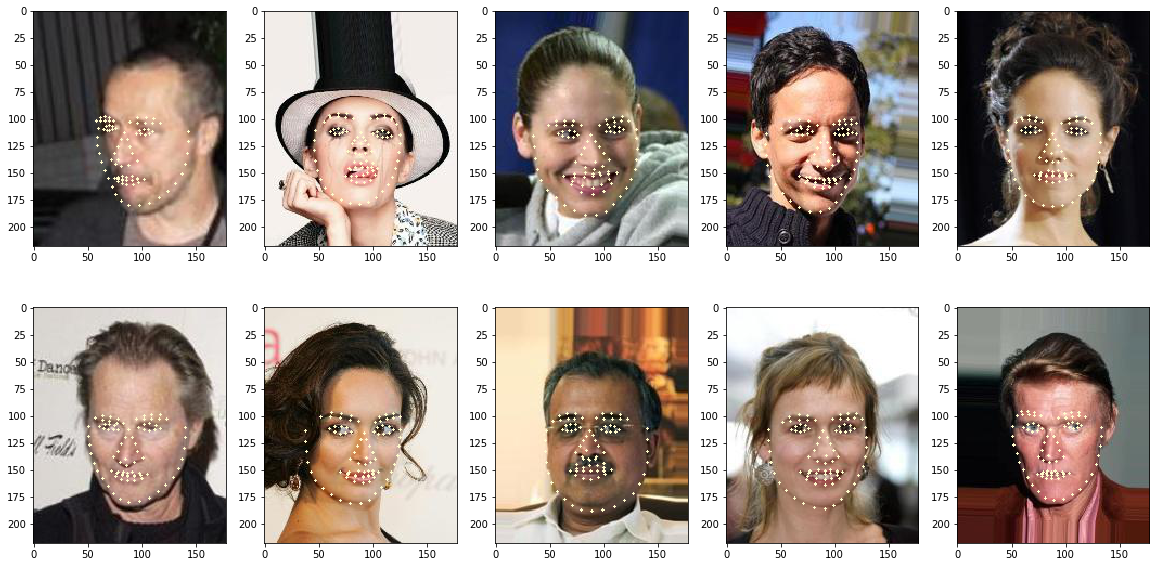

In [23]:
plt.figure(figsize=(20, 10))

for i in range(11):
    img = imread('img_align_celeba/'+error_list[i]+'.jpg')
    pts = flatten_lists_to_tuples(get_points('img_align_celeba_dots/'+error_list[i]+'.json'))
    result = draw_circle(img, flatten_lists_to_tuples(pts))
    plt.subplot(2, 5, i+1)
    plt.imshow(result)

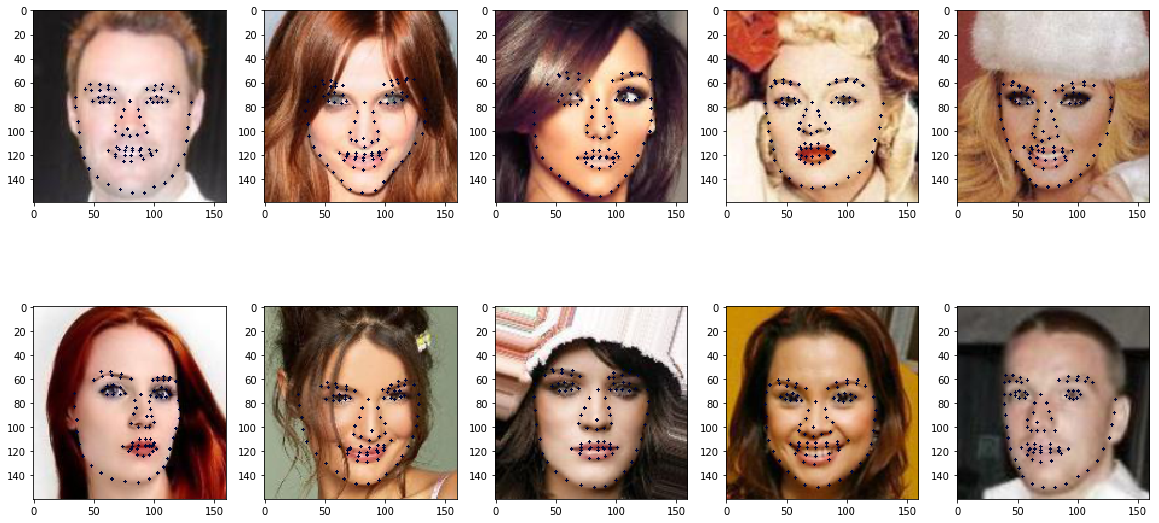

In [34]:
plt.figure(figsize=(20, 10))
num = 0
for i in range(num,num+10):
    result = draw_circle(error_X[i], flatten_lists_to_tuples(error_y[i]))
    plt.subplot(2, 5, i+1-num)
    plt.imshow(result)

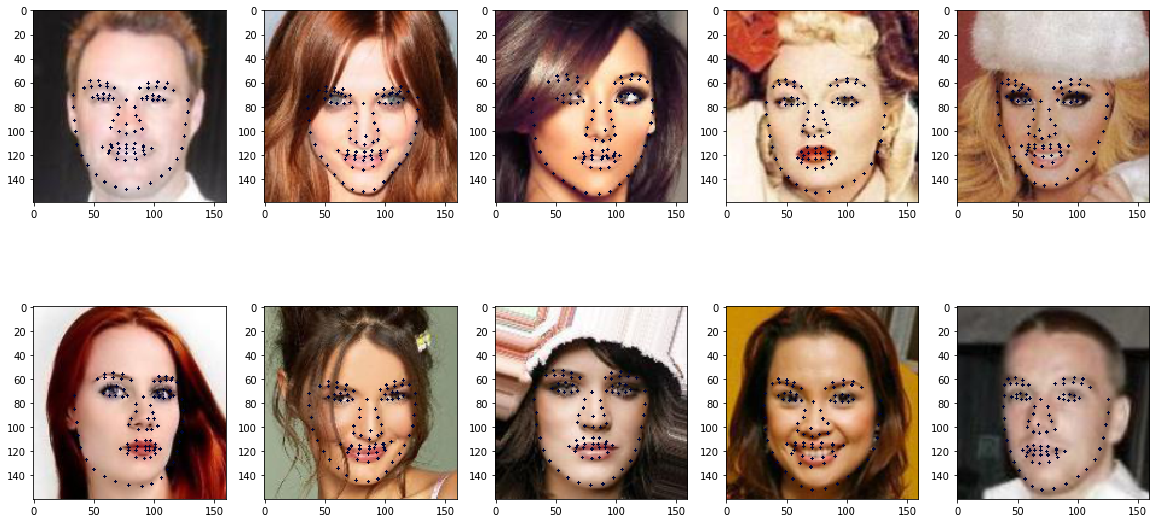

In [35]:
plt.figure(figsize=(20, 10))
num = 0
for i in range(num,num+10):
    result = draw_circle(error_X[i], flatten_lists_to_tuples(error_pred[i]))
    plt.subplot(2, 5, i+1-num)
    plt.imshow(result)

# Make Video

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
import imageio
filename = 'test_orig.mp4'
vid = imageio.get_reader(filename,'ffmpeg')

images = []
for num in range(len(vid)):
    images.append(vid.get_data(num))
    
len(images)

600

In [4]:
images[50].shape

(368, 640, 3)

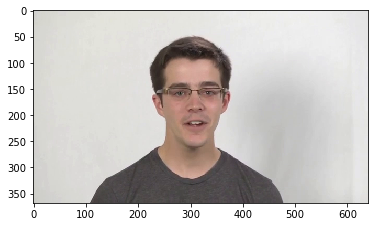

In [5]:
img = images[50]
plt.imshow(img)

In [6]:
import detect_face
import tensorflow as tf

print('Creating networks and loading parameters')   
with tf.Graph().as_default():
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_mtcnn(sess, None)


Creating networks and loading parameters


In [8]:
from scipy.misc import imsave,imread,imresize
import cv2
from keras.models import load_model
import time

def flatten_lists_to_tuples(points):
    points = np.reshape(points,(-1,2))
    pts = tuple([(x,y) for x,y in points])
    return pts


def draw_circle(img, dots, color=(255,250,205), thick=3):
    draw_img = np.copy(img)
    for dot in dots:
        draw_img = cv2.circle(draw_img,dot,1,color,-1,thick)
    return draw_img 

def get_boxes(img):
    """
    input: single image file path
    return: box points in 2d numpy array, shape=(m,4), if m=1, tehn boxes = [[x1,y1,x2,y2]]   
    """
    
    # parameters for "detect_face"
    minsize = 40 # minimum size of face
    threshold = [ 0.4, 0.5, 0.6 ]  # three steps's threshold
    factor = 0.6 # scale factor

#     img = imread(filename)
    boxes, five_dots = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor) # don't use five dots
    bboxes = [[int(x1),int(y1),int(x2),int(y2)] for x1,y1,x2,y2,confidence in boxes]
    
    return bboxes



In [7]:
# load model
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import warnings
from keras.models import Model,load_model,Sequential
from keras.layers import Input, Activation, Dropout, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Conv2D
from keras import initializers, regularizers, constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras.applications import imagenet_utils
from keras.applications.imagenet_utils import decode_predictions, _obtain_input_shape
from keras import backend as K

def loss_max(y_true, y_pred):
    from keras import backend as K
    return K.max(K.abs(y_pred - y_true), axis=-1)

class DepthwiseConv2D(Conv2D):
    def __init__(self,
                 kernel_size,
                 strides=(1, 1),
                 padding='valid',
                 depth_multiplier=1,
                 data_format=None,
                 activation=None,
                 use_bias=True,
                 depthwise_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 depthwise_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 depthwise_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        super(DepthwiseConv2D, self).__init__(
            filters=None,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding,
            data_format=data_format,
            activation=activation,
            use_bias=use_bias,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            bias_constraint=bias_constraint,
            **kwargs)
        self.depth_multiplier = depth_multiplier
        self.depthwise_initializer = initializers.get(depthwise_initializer)
        self.depthwise_regularizer = regularizers.get(depthwise_regularizer)
        self.depthwise_constraint = constraints.get(depthwise_constraint)
        self.bias_initializer = initializers.get(bias_initializer)

    def build(self, input_shape):
        if len(input_shape) < 4:
            raise ValueError('Inputs to `DepthwiseConv2D` should have rank 4. '
                             'Received input shape:', str(input_shape))
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = 3
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs to '
                             '`DepthwiseConv2D` '
                             'should be defined. Found `None`.')
        input_dim = int(input_shape[channel_axis])
        depthwise_kernel_shape = (self.kernel_size[0], self.kernel_size[1],
                                  input_dim, self.depth_multiplier)

        self.depthwise_kernel = self.add_weight(
            shape=depthwise_kernel_shape,
            initializer=self.depthwise_initializer,
            name='depthwise_kernel',
            regularizer=self.depthwise_regularizer,
            constraint=self.depthwise_constraint)

        if self.use_bias:
            self.bias = self.add_weight(
                shape=(input_dim * self.depth_multiplier, ),
                initializer=self.bias_initializer,
                name='bias',
                regularizer=self.bias_regularizer,
                constraint=self.bias_constraint)
        else:
            self.bias = None
        # Set input spec.
        self.input_spec = InputSpec(ndim=4, axes={channel_axis: input_dim})
        self.built = True

    def call(self, inputs, training=None):
        outputs = K.depthwise_conv2d(
            inputs,
            self.depthwise_kernel,
            strides=self.strides,
            padding=self.padding,
            dilation_rate=self.dilation_rate,
            data_format=self.data_format)

        if self.bias:
            outputs = K.bias_add(
                outputs, self.bias, data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)

        return outputs

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            rows = input_shape[2]
            cols = input_shape[3]
            out_filters = input_shape[1] * self.depth_multiplier
        elif self.data_format == 'channels_last':
            rows = input_shape[1]
            cols = input_shape[2]
            out_filters = input_shape[3] * self.depth_multiplier

        rows = conv_utils.conv_output_length(rows, self.kernel_size[0],
                                             self.padding, self.strides[0])
        cols = conv_utils.conv_output_length(cols, self.kernel_size[1],
                                             self.padding, self.strides[1])

        if self.data_format == 'channels_first':
            return (input_shape[0], out_filters, rows, cols)
        elif self.data_format == 'channels_last':
            return (input_shape[0], rows, cols, out_filters)

    def get_config(self):
        config = super(DepthwiseConv2D, self).get_config()
        config.pop('filters')
        config.pop('kernel_initializer')
        config.pop('kernel_regularizer')
        config.pop('kernel_constraint')
        config['depth_multiplier'] = self.depth_multiplier
        config['depthwise_initializer'] = initializers.serialize(
            self.depthwise_initializer)
        config['depthwise_regularizer'] = regularizers.serialize(
            self.depthwise_regularizer)
        config['depthwise_constraint'] = constraints.serialize(
            self.depthwise_constraint)
        return config

    
def relu6(x):
    return K.relu(x, max_value=6)




model = load_model('train_mobilenet_models/0.3alpha_shallow_54_1.795.h5'
                   ,custom_objects={'DepthwiseConv2D': DepthwiseConv2D,'loss_max':loss_max,'relu6':relu6})
# model = load_model('third_035_3.828.h5')


In [9]:
def get_img_face_points(img, model=model):
    """ 
    inputs: 
        img: original image (np.array)
    return: points
    """
    start_time  = time.time()
    box = get_boxes(img)[0]
    box_time = time.time()-start_time
    
    
    
    start_time  = time.time()
    rect_x1, rect_y1, rect_x2, rect_y2 = box
    
    crop_y1 = rect_y1 - 0.2*(rect_y2-rect_y1)
    crop_y2 = rect_y2 + 0.1*(rect_y2-rect_y1)
    pad_x = (crop_y2-crop_y1) - (rect_x2 - rect_x1)
    crop_x1 = rect_x1 - pad_x/2
    crop_x2 = rect_x2 + pad_x/2

    a,b,c,d = int(round(crop_x1)), int(round(crop_y1)), int(round(crop_x2)), int(round(crop_y2))
    img_crop = img[b:d,a:c,:]/255.
    img_resized = imresize(img_crop, (160,160))/255.
    w,h = img[b:d,a:c,:].shape[:2]

    resized_time = time.time()-start_time    

    
    # return img_crop,img_resized get 176 points, then inverse
    start_time  = time.time()
    points = model.predict(img_resized.reshape(1,160,160,3)) ##############
    prediction_time = time.time()-start_time

    start_time  = time.time()
    points_inverse_resize = points*(w/160.)
    points_inverse_crop = np.round(points_inverse_resize.reshape(-1,2) + [a,b]).astype(int).reshape(-1)

    img_points = draw_circle(img, flatten_lists_to_tuples(points_inverse_crop))
    draw_points_time = time.time()-start_time
    
    return img_points,box_time,resized_time,prediction_time,draw_points_time

CPU times: user 247 ms, sys: 20.2 ms, total: 267 ms
Wall time: 121 ms
<class 'tuple'>


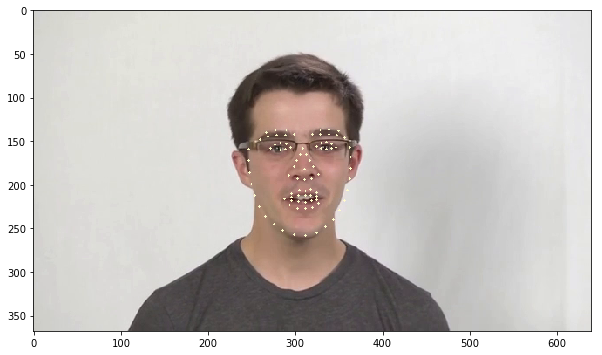

In [18]:
plt.figure(figsize=(10, 10))

%time result = get_img_face_points(img)
plt.imshow(result[0])
print(type(result))

In [19]:
import imageio

writer = imageio.get_writer('test_result.mp4', fps=30)

box_times = []
resized_times = []
prediction_times = []
draw_points_times = []
img_times = []
for i,image in enumerate(images):
    if i%100==0:
        print(i)
    start_time = time.time()
    img_points,box_time,resized_time,prediction_time,draw_points_time = get_img_face_points(image)
    img_time = time.time()-start_time
    img_times.append(img_time)
    
    box_times.append(box_time) 
    resized_times.append(resized_time)
    prediction_times.append(prediction_time)
    draw_points_times.append(draw_points_time)
    writer.append_data(img_points)
#     writer.append_data(get_img_face_points(image))
writer.close()

m = len(images)
print("box_time: ",sum(box_times)/m)
print("resized_time: ",sum(resized_times)/m)
print("prediction_time: ",sum(prediction_times)/m)
print("draw_points_time: ",sum(draw_points_times)/m)
print("img_time:",sum(img_times)/m)



0
100
200
300
400
500
box_time:  0.06922256827354431
resized_time:  0.002156342267990112
prediction_time:  0.025244923830032347
draw_points_time:  0.000365825891494751
img_time: 0.09744049429893493


box_time:  0.06922256827354431   
resized_time:  0.002156342267990112   
prediction_time:  0.025244923830032347   
draw_points_time:  0.000365825891494751   
img_time: 0.09744049429893493   

# Others
show points one by one

In [66]:
import json
from itertools import chain

points_name = ['face_profile','nose','mouth','left_eyebrow','left_eye','right_eyebrow','right_eye']

def get_points(filename):
    with open(filename, 'r') as f:
        points_dic = json.load(f)
    # dict to list of lists of lists
    # points_listss =  [v for _, v in points_dic.items()] 
    points_listss = [points_dic[n] for n in points_name]
    # list of lists of lists to list
    points = np.array(list(chain.from_iterable(points_listss)))
    return points



In [67]:
pts = get_points('mini_train_image/000009.json')

In [71]:
def flatten_lists_to_tuples(points):
    points = np.reshape(points,(-1,2))
    pts = tuple([(x,y) for x,y in points])
    return pts

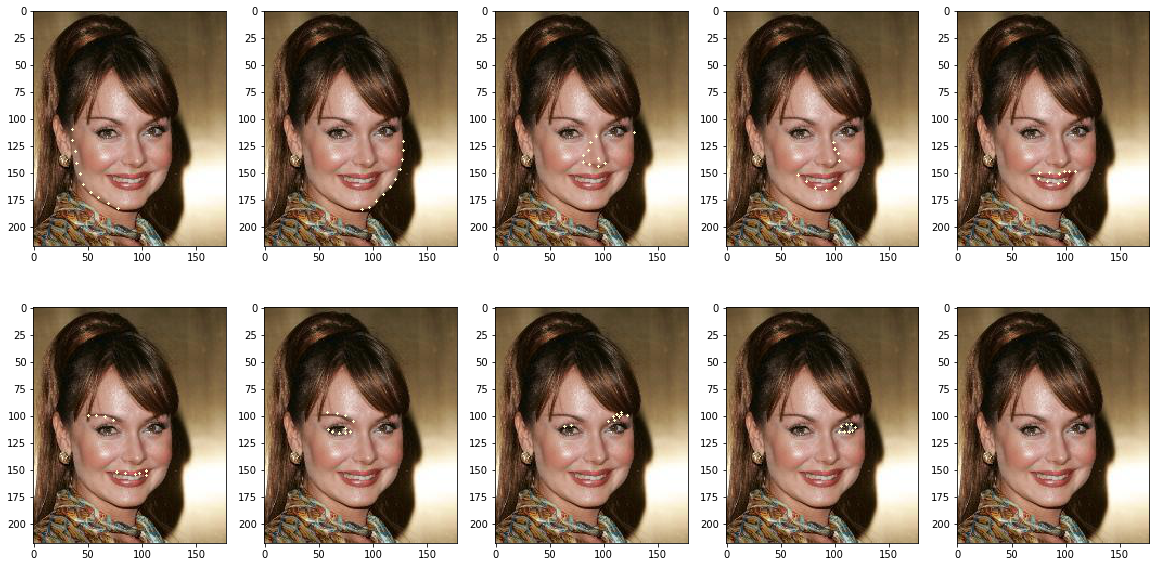

In [77]:
plt.figure(figsize=(20, 10))

img = imread('mini_train_image/000009.jpg')
for i in range(0,10):
    result = draw_circle(img, flatten_lists_to_tuples(pts[i*10:i*10+10]))
    plt.subplot(2, 5, i+1)
    plt.imshow(result)